In [286]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [287]:
import sys
sys.path.append('../../')
from pocs.utils import hdr

In [288]:
from astropy import units as u
from astropy import constants as c

In [289]:
#Creating an imager array object
imager_array = hdr.create_imager_array()

In [300]:
#Generating a list of exposure times for the imager array
explist = imager_array.exposure_time_array(minimum_magnitude=10*u.ABmag, name = 'canon_sbig_g', long_exposures = None, factor=2, maximum_exptime = 300 * u.second, maximum_magnitude = 21 * u.ABmag)
print (explist)

[   2.34    4.69    9.38   18.75   37.5    75.    150.    300.    300.
  300.  ] s


In [301]:
#calculates the total exposure time and total elapsed time for a set of exposure times 
imager_array.total_time_calculation(explist)

(<Quantity 1197.6599999999999 s>, <Quantity 1277.6599999999999 s>)

In [302]:
#calculates the saturation limits corresponding to a set of exposure times
imager_array.saturation_limits(explist, name = 'canon_sbig_g')

<Quantity [  9.50577478, 10.26076679, 11.01354047, 11.76593361,
            12.51930359, 13.2734703 , 14.02923575, 14.78821992,
            14.78821992, 14.78821992] mag(AB)>

/Users/huntsman/Documents/POCS/pocs/utils/signal_to_noise.py:160: RuntimeWarning: Rounding up total exposure to next integer multiple of sub-exposure time: 1500.0 s
  warn('Rounding up total exposure to next integer multiple of sub-exposure time: {}'.format(total_exp_time), category=RuntimeWarning)
/Users/huntsman/anaconda3/lib/python3.5/site-packages/astropy/units/quantity.py:841: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.function.logarithmic.Magnitude'>


(<Magnitude [  9.50577478,  9.60577478,  9.70577478,  9.80577478,
               9.90577478, 10.00577478, 10.10577478, 10.20577478,
              10.30577478, 10.40577478, 10.50577478, 10.60577478,
              10.70577478, 10.80577478, 10.90577478, 11.00577478,
              11.10577478, 11.20577478, 11.30577478, 11.40577478,
              11.50577478, 11.60577478, 11.70577478, 11.80577478,
              11.90577478, 12.00577478, 12.10577478, 12.20577478,
              12.30577478, 12.40577478, 12.50577478, 12.60577478,
              12.70577478, 12.80577478, 12.90577478, 13.00577478,
              13.10577478, 13.20577478, 13.30577478, 13.40577478,
              13.50577478, 13.60577478, 13.70577478, 13.80577478,
              13.90577478, 14.00577478, 14.10577478, 14.20577478,
              14.30577478, 14.40577478, 14.50577478, 14.60577478,
              14.70577478, 14.80577478, 14.90577478, 15.00577478,
              15.10577478, 15.20577478, 15.30577478, 15.40577478,
          

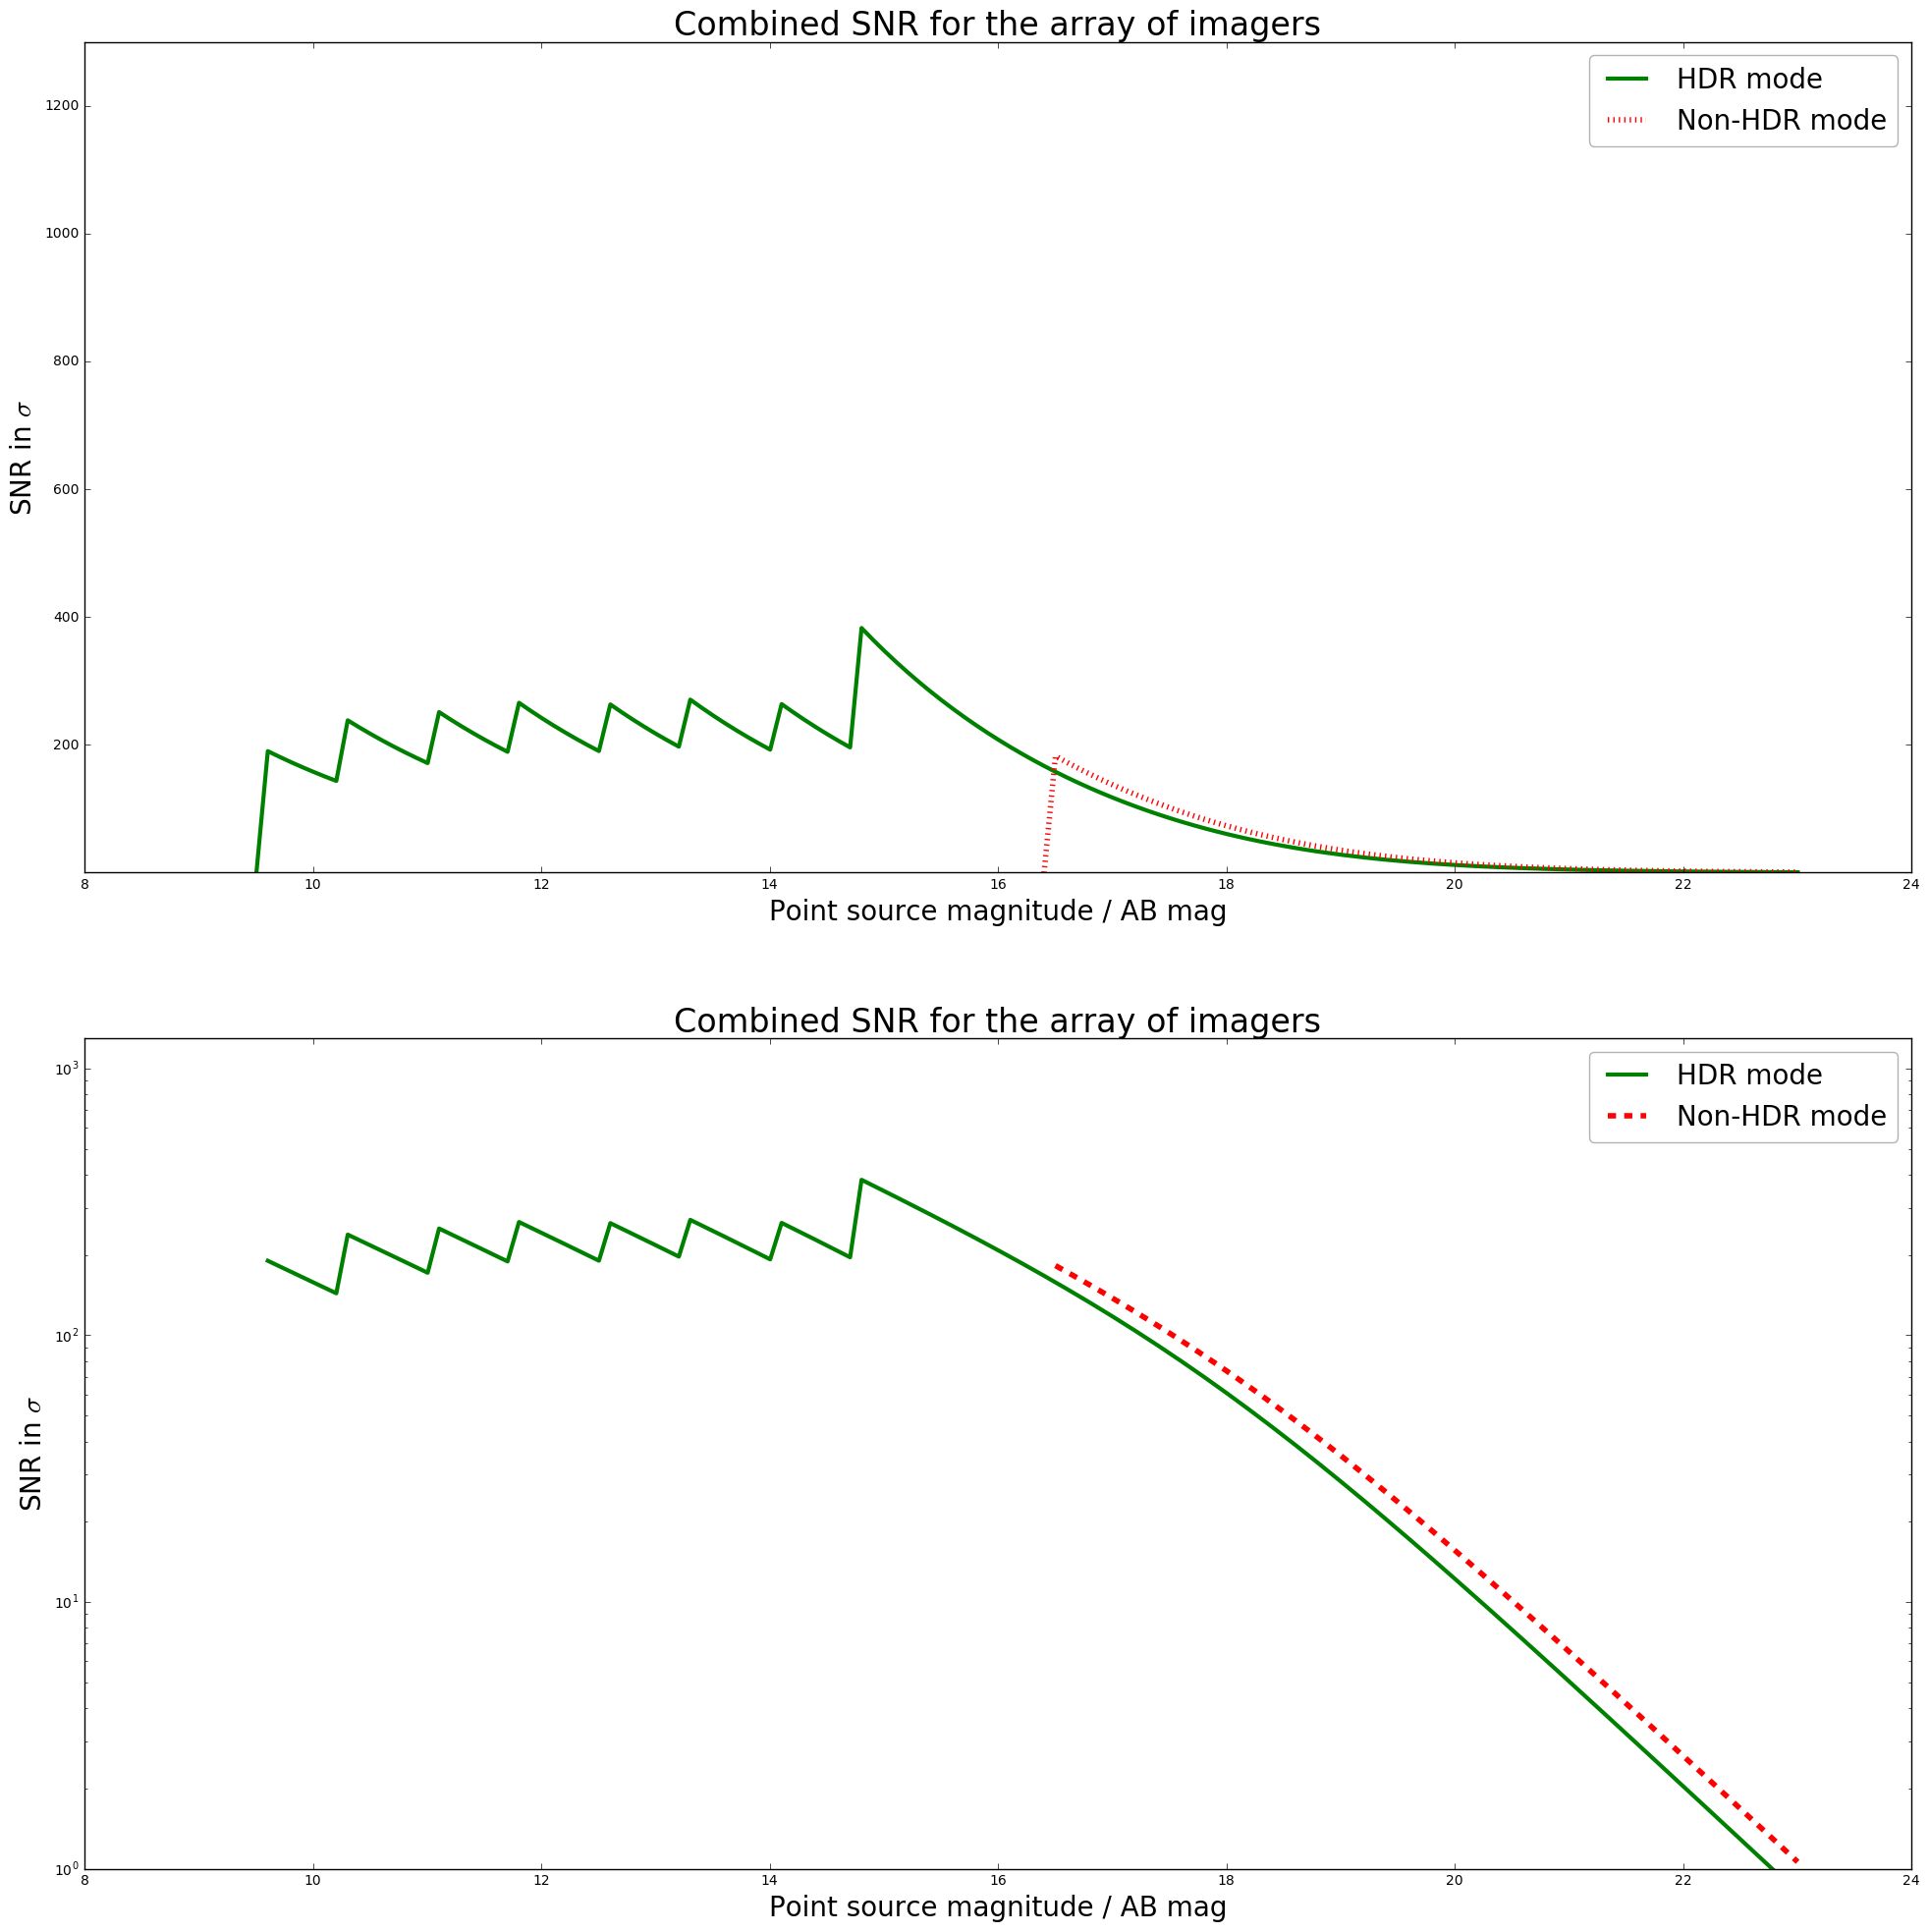

In [303]:
#Generates a plot of SNR versus magnitude for a point source for a HDR mode against a non-HDR mode
%matplotlib inline
imager_array.snr_plot(explist, name = 'canon_sbig_g', generate_plots = True)

/Users/huntsman/Documents/POCS/pocs/utils/signal_to_noise.py:160: RuntimeWarning: Rounding up total exposure to next integer multiple of sub-exposure time: 900.0 s
  warn('Rounding up total exposure to next integer multiple of sub-exposure time: {}'.format(total_exp_time), category=RuntimeWarning)
/Users/huntsman/anaconda3/lib/python3.5/site-packages/astropy/units/quantity.py:841: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.function.logarithmic.Magnitude'>


(<Quantity [   2.34,   4.69,   9.38,  18.75,  37.5 ,  75.  , 150.  , 300.  ] s>,
 <Quantity [  9.50577478, 10.26076679, 11.01354047, 11.76593361,
             12.51930359, 13.2734703 , 14.02923575, 14.78821992] mag(AB)>,
 (<Quantity 597.66 s>, <Quantity 661.66 s>),
 (<Magnitude [  9.50577478,  9.60577478,  9.70577478,  9.80577478,
                9.90577478, 10.00577478, 10.10577478, 10.20577478,
               10.30577478, 10.40577478, 10.50577478, 10.60577478,
               10.70577478, 10.80577478, 10.90577478, 11.00577478,
               11.10577478, 11.20577478, 11.30577478, 11.40577478,
               11.50577478, 11.60577478, 11.70577478, 11.80577478,
               11.90577478, 12.00577478, 12.10577478, 12.20577478,
               12.30577478, 12.40577478, 12.50577478, 12.60577478,
               12.70577478, 12.80577478, 12.90577478, 13.00577478,
               13.10577478, 13.20577478, 13.30577478, 13.40577478,
               13.50577478, 13.60577478, 13.70577478, 13.8057747

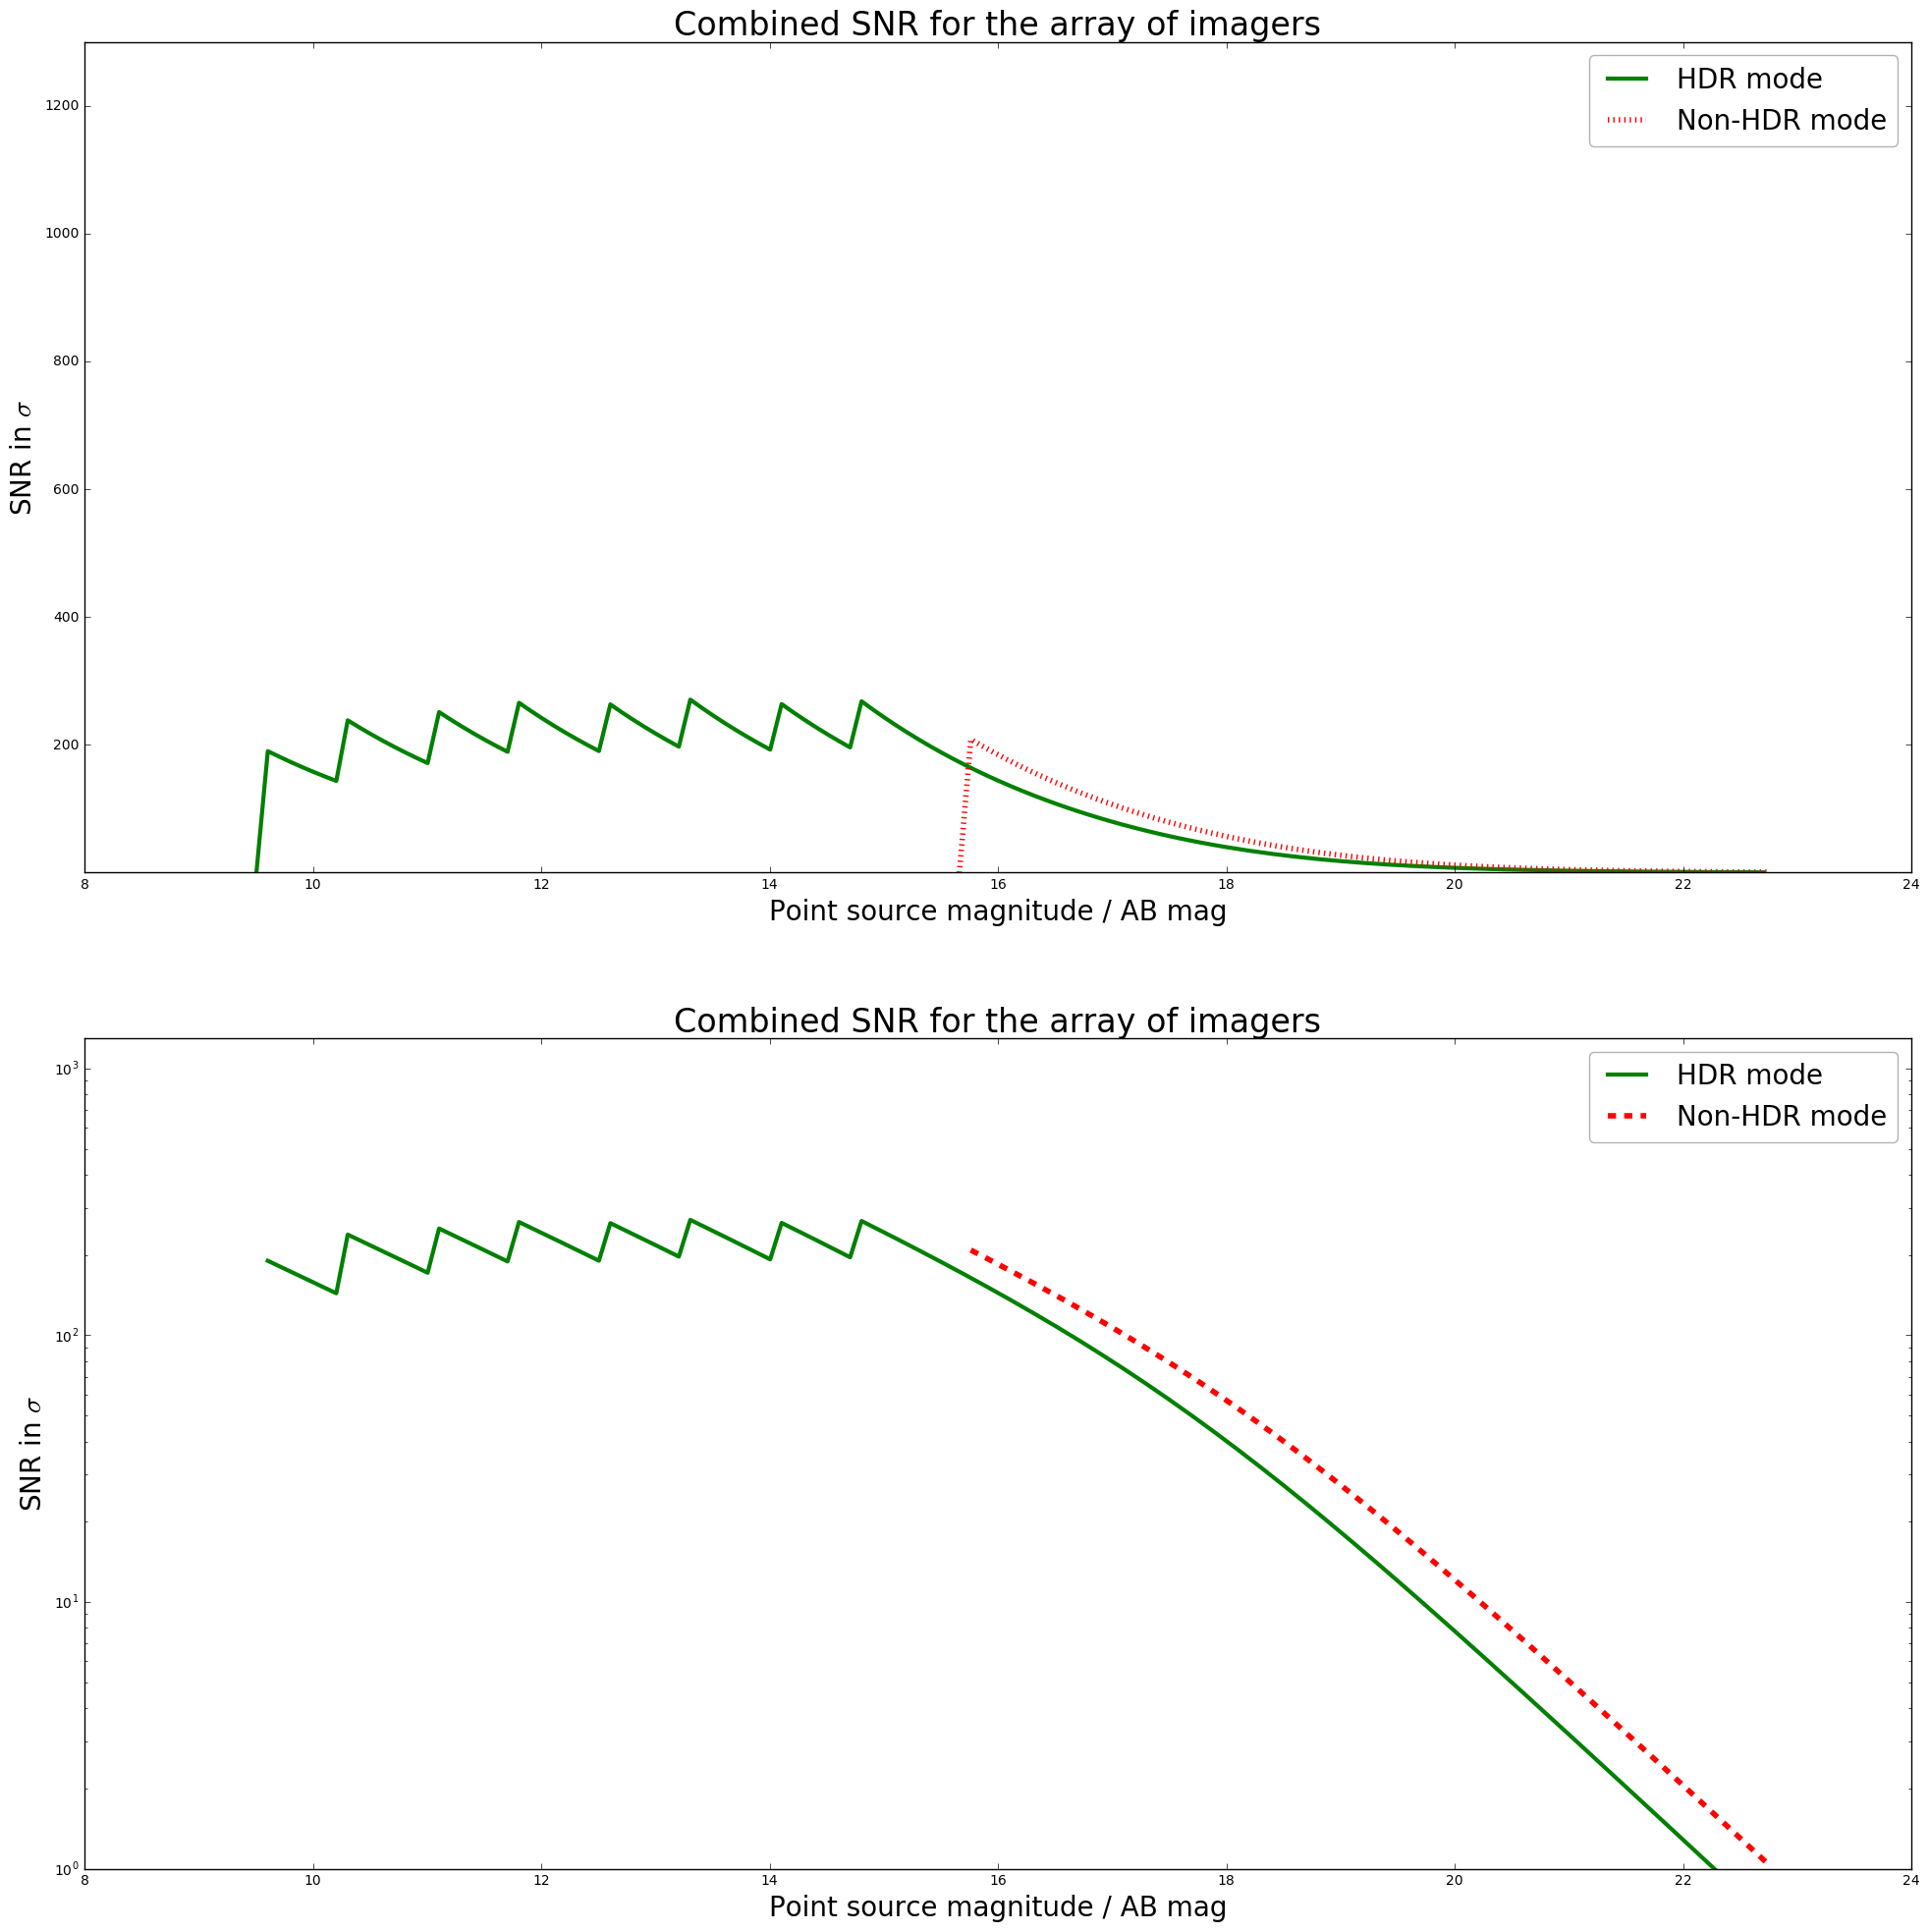

In [304]:
#generates all the information required for an HDR mode
imager_array.HDR_mode(minimum_magnitude=10*u.ABmag, name = 'canon_sbig_g', factor=2, maximum_exptime = 300 * u.second, generate_plots = True, maximum_magnitude = None)

In [305]:
#generates a list of dictionaries with each dictionary containing a different target position
from astropy.coordinates import SkyCoord
ra='13 37 00'
dec='-29 51 56.74'
ra_dec1=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg), equinox='J2000', obstime='2014.58')
offset=0.5*u.deg
target_list = hdr.get_hdr_target_list(imager_array, ra_dec1, 'betelgeuse', 10*u.ABmag, 'canon_sbig_g', 1, maximum_magnitude=None)
print (target_list)

[{'epoch': '2014.58', 'equinox': 'J2000', 'name': 'betelgeuse', 'frame': 'icrs', 'priority': 100, 'position': '13h36m58.0104s -29d52m45.5626s', 'visit': {'primary_exptime': 2.34, 'primary_nexp': 1}}, {'epoch': '2014.58', 'equinox': 'J2000', 'name': 'betelgeuse', 'frame': 'icrs', 'priority': 100, 'position': '13h37m45.8148s -29d43m15.3691s', 'visit': {'primary_exptime': 4.69, 'primary_nexp': 1}}, {'epoch': '2014.58', 'equinox': 'J2000', 'name': 'betelgeuse', 'frame': 'icrs', 'priority': 100, 'position': '13h37m59.0925s -29d54m17.7248s', 'visit': {'primary_exptime': 9.38, 'primary_nexp': 1}}, {'epoch': '2014.58', 'equinox': 'J2000', 'name': 'betelgeuse', 'frame': 'icrs', 'priority': 100, 'position': '13h38m01.9983s -30d01m51.1946s', 'visit': {'primary_exptime': 18.75, 'primary_nexp': 1}}, {'epoch': '2014.58', 'equinox': 'J2000', 'name': 'betelgeuse', 'frame': 'icrs', 'priority': 100, 'position': '13h36m55.7025s -30d01m14.629s', 'visit': {'primary_exptime': 37.5, 'primary_nexp': 1}}, {'ep

In [122]:
import numpy as np
a = np.zeros(5)
a = a * u.electron
print (a ** 2)



[ 0.  0.  0.  0.  0.] electron2


In [215]:
from astropy import units as u
a = [1, 2, 3] * u.second
len(a)
a.unit

Unit("s")

In [197]:
a = 10 * u.second
c = 10 * u.second
b = a/c
print (type(b))
b.to(u.dimensionless_unscaled)

<class 'astropy.units.quantity.Quantity'>


<Quantity 1.0>

In [244]:
a = []
a.append(1)
a.append(2)
print (a)

[1, 2]


In [282]:
import numpy as np
a = np.arange(1,10,1)
a=a * u.second
print (type(a))
for b in a:
    print (b)

<class 'astropy.units.quantity.Quantity'>
1.0 s
2.0 s
3.0 s
4.0 s
5.0 s
6.0 s
7.0 s
8.0 s
9.0 s


In [281]:
np.any(a[:, 0] == 1 * u.second)

IndexError: too many indices for array